In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Abrir o arquivo CSV com as medições feitas utilizando Python
df = pd.read_csv('./Arquivos/output/outputPythonSimples.csv', sep=',')
# Fazer algumas modificações no DataFrame
df['Tempo de Execucao (s)'] = df['Tempo de Execucao (s)'].astype(float)
df['Execucao'] = np.arange(1, len(df) + 1) // 4 + 1
# Mostrar as primeiras linhas do DataFrame
display(df.head(10))

,Quantidade de Elementos,Tempo de Execucao (s),Metodo,Multithreading,Execucao
0,10000,3.389578,Insertion Sort,Nao,1
1,10000,0.018863,Bucket Sort,Nao,1
2,10000,3.359336,Insertion Sort,Sim,1
3,10000,0.029769,Bucket Sort,Sim,2
4,10000,3.696490,Insertion Sort,Nao,2
5,10000,0.018755,Bucket Sort,Nao,2
6,10000,3.376900,Insertion Sort,Sim,2
7,10000,0.031513,Bucket Sort,Sim,3
8,10000,3.357251,Insertion Sort,Nao,3
9,10000,0.008252,Bucket Sort,Nao,3


## Estrutura dos Dados

Os dados estão organizados da seguinte forma:
- **Quantidade de Elementos**: Número de elementos ordenados (10.000 em todos os testes)
- **Tempo de Execucao (s)**: Tempo em segundos para completar a ordenação
- **Metodo**: Algoritmo utilizado (Insertion Sort ou Bucket Sort)
- **Multithreading**: Se foi utilizada a versão com multithreading (Sim/Não)
- **Execucao**: Identificador da execução (agrupamento de 4 testes consecutivos)

Vamos analisar o desempenho dos diferentes métodos ao longo das execuções.

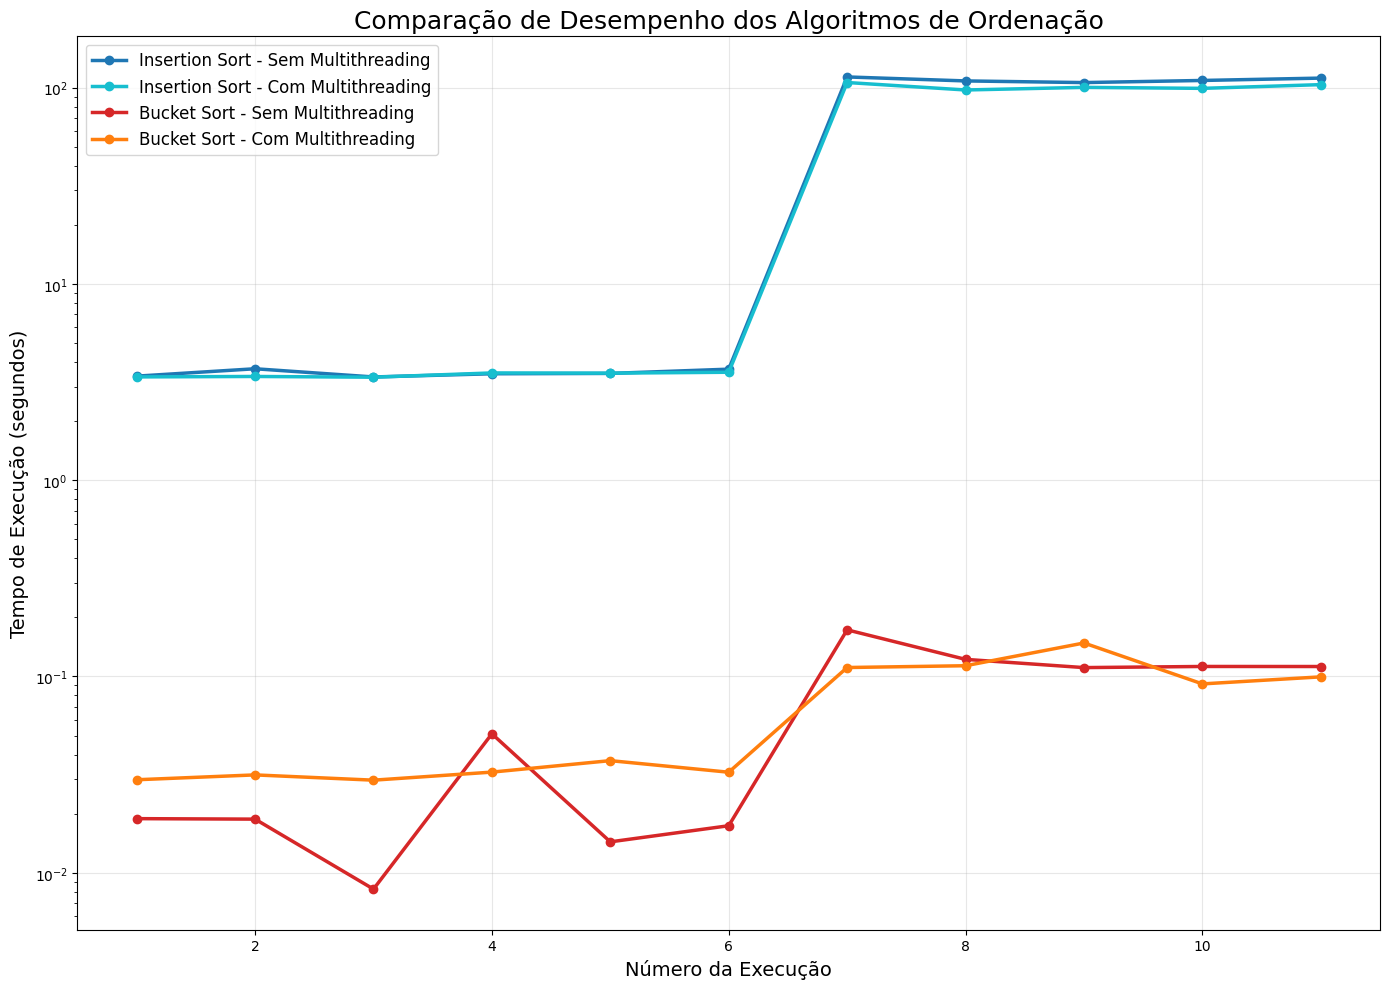

In [47]:
# Criar um dicionário para armazenar os dados de cada método
metodos_data = {
    'Insertion Sort - Sem Multithreading': [],
    'Insertion Sort - Com Multithreading': [],
    'Bucket Sort - Sem Multithreading': [],
    'Bucket Sort - Com Multithreading': []
}

# Agrupar execuções para cada método
for execucao in sorted(df['Execucao'].unique()):
    dados_execucao = df[df['Execucao'] == execucao]
    
    # Insertion Sort sem Multithreading
    tempo = dados_execucao[(dados_execucao['Metodo'] == 'Insertion Sort') & 
                          (dados_execucao['Multithreading'] == 'Nao')]['Tempo de Execucao (s)'].values
    if len(tempo) > 0:
        metodos_data['Insertion Sort - Sem Multithreading'].append(tempo[0])
    
    # Insertion Sort com Multithreading
    tempo = dados_execucao[(dados_execucao['Metodo'] == 'Insertion Sort') & 
                          (dados_execucao['Multithreading'] == 'Sim')]['Tempo de Execucao (s)'].values
    if len(tempo) > 0:
        metodos_data['Insertion Sort - Com Multithreading'].append(tempo[0])
    
    # Bucket Sort sem Multithreading
    tempo = dados_execucao[(dados_execucao['Metodo'] == 'Bucket Sort') & 
                          (dados_execucao['Multithreading'] == 'Nao')]['Tempo de Execucao (s)'].values
    if len(tempo) > 0:
        metodos_data['Bucket Sort - Sem Multithreading'].append(tempo[0])
    
    # Bucket Sort com Multithreading
    tempo = dados_execucao[(dados_execucao['Metodo'] == 'Bucket Sort') & 
                          (dados_execucao['Multithreading'] == 'Sim')]['Tempo de Execucao (s)'].values
    if len(tempo) > 0:
        metodos_data['Bucket Sort - Com Multithreading'].append(tempo[0])

# Definir cores para cada método
cores = {
    'Insertion Sort - Sem Multithreading': '#1f77b4',  # Azul
    'Insertion Sort - Com Multithreading': '#17becf',  # Ciano
    'Bucket Sort - Sem Multithreading': '#d62728',     # Vermelho
    'Bucket Sort - Com Multithreading': '#ff7f0e'      # Laranja
}

# Criar gráfico
plt.figure(figsize=(14, 10))
execucoes = range(1, len(next(iter(metodos_data.values()))) + 1)

for metodo, tempos in metodos_data.items():
    plt.plot(execucoes, tempos, marker='o', linestyle='-', linewidth=2.5, 
             color=cores[metodo], label=metodo)

# Configurar o gráfico
plt.title('Comparação de Desempenho dos Algoritmos de Ordenação', fontsize=18)
plt.xlabel('Número da Execução', fontsize=14)
plt.ylabel('Tempo de Execução (segundos)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.tight_layout()

plt.savefig('./Arquivos/output/grafico_comparacao.png', dpi=300)
plt.show()

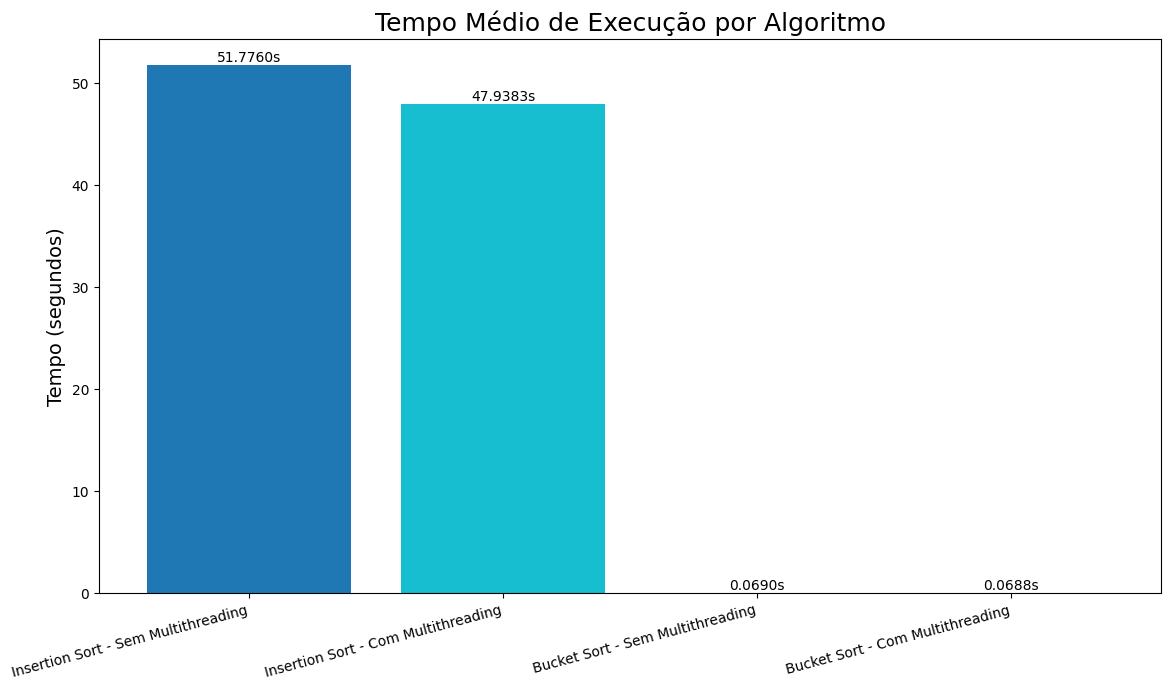

In [48]:
# Calcular médias
medias = {metodo: np.mean(tempos) for metodo, tempos in metodos_data.items()}

# Criar gráfico de barras
plt.figure(figsize=(12, 7))
bar_colors = [cores[metodo] for metodo in medias.keys()]
bars = plt.bar(medias.keys(), medias.values(), color=bar_colors)

# Adicionar rótulos de valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}s',
             ha='center', va='bottom', fontsize=10)

plt.title('Tempo Médio de Execução por Algoritmo', fontsize=18)
plt.ylabel('Tempo (segundos)', fontsize=14)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()

plt.savefig('./Arquivos/output/grafico_medias.png', dpi=300)
plt.show()

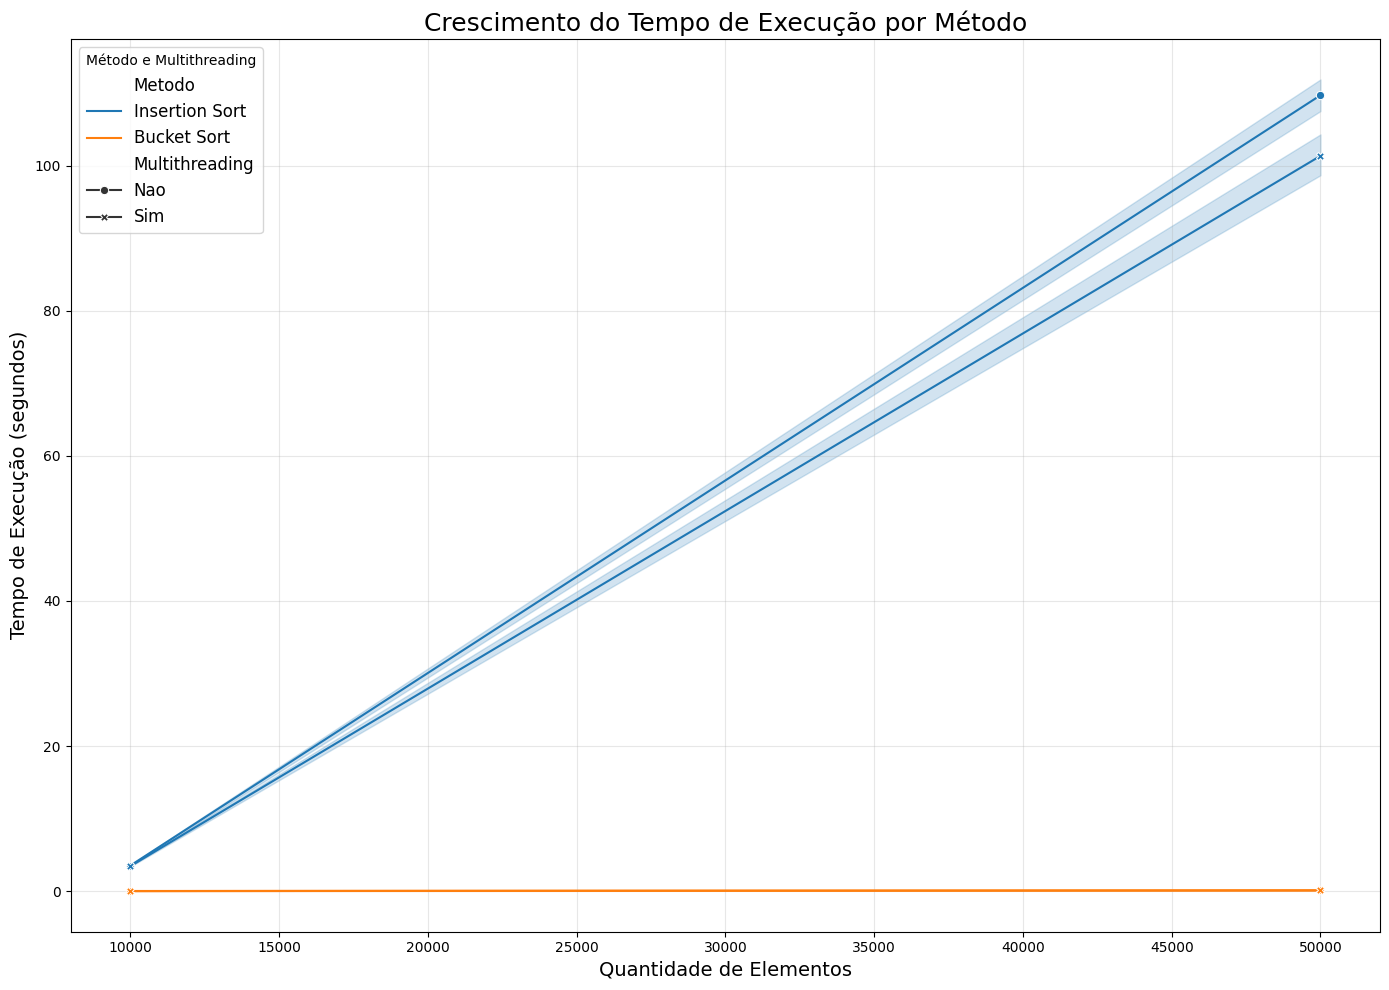

In [49]:
# Plotar um gráfico com o crescimento do tempo de execução entre ambos os métodos
# No eixo y, colocar o tempo de execução, e no eixo x, o número de elementos
# Criar um gráfico crescente para o tempo de execução por método
plt.figure(figsize=(14, 10))
sns.lineplot(data=df, x='Quantidade de Elementos', y='Tempo de Execucao (s)', hue='Metodo', style='Multithreading', markers=True, dashes=False)
plt.title('Crescimento do Tempo de Execução por Método', fontsize=18)
plt.xlabel('Quantidade de Elementos', fontsize=14)
plt.ylabel('Tempo de Execução (segundos)', fontsize=14)
plt.legend(title='Método e Multithreading', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('./Arquivos/output/grafico_crescimento.png', dpi=300)
plt.show()


In [50]:
# Criar DataFrame com as estatísticas
stats = []

for metodo, tempos in metodos_data.items():
    stats.append({
        'Método': metodo,
        'Média (s)': np.mean(tempos),
        'Mediana (s)': np.median(tempos),
        'Desvio Padrão (s)': np.std(tempos),
        'Mínimo (s)': min(tempos),
        'Máximo (s)': max(tempos)
    })

df_stats = pd.DataFrame(stats)
df_stats = df_stats.sort_values('Média (s)')

# Mostrar a tabela com estatísticas
display(df_stats)

# Calcular speedup (comparação com o método mais lento)
metodo_mais_lento = df_stats.iloc[-1]['Método']
tempo_mais_lento = df_stats.iloc[-1]['Média (s)']

print(f"\nSpeedup em relação ao método mais lento ({metodo_mais_lento}):")
for index, row in df_stats.iterrows():
    speedup = tempo_mais_lento / row['Média (s)']
    print(f"{row['Método']}: {speedup:.2f}x mais rápido")

,Método,Média (s),Mediana (s),Desvio Padrão (s),Mínimo (s),Máximo (s)
3,Bucket Sort - Com Multithreading,0.068820,0.037251,0.042220,0.029624,0.148109
2,Bucket Sort - Sem Multithreading,0.069039,0.051039,0.055462,0.008252,0.172781
1,Insertion Sort - Com Multithreading,47.938320,3.548039,48.788939,3.347502,106.220770
0,Insertion Sort - Sem Multithreading,51.776010,3.696490,52.893438,3.357251,113.394088



Speedup em relação ao método mais lento (Insertion Sort - Sem Multithreading):
Bucket Sort - Com Multithreading: 752.34x mais rápido
Bucket Sort - Sem Multithreading: 749.95x mais rápido
Insertion Sort - Com Multithreading: 1.08x mais rápido
Insertion Sort - Sem Multithreading: 1.00x mais rápido


## Conclusões

Da análise dos resultados, podemos observar:

1. **Bucket Sort vs Insertion Sort**:
   - O Bucket Sort é significativamente mais rápido que o Insertion Sort para conjuntos de 10.000 elementos
   - A diferença de desempenho é de várias ordens de magnitude

2. **Impacto do Multithreading**:
   - No Insertion Sort: o multithreading não trouxe ganhos significativos
   - No Bucket Sort: o multithreading parece ter adicionado um pequeno overhead, tornando-o ligeiramente mais lento

3. **Estabilidade dos Algoritmos**:
   - Os tempos de execução são relativamente consistentes entre as diferentes execuções
   - O Bucket Sort apresenta maior variabilidade relativa no tempo de execução

4. **Considerações Práticas**:
   - Para conjuntos de dados desta magnitude (10.000 elementos), o Bucket Sort é claramente a escolha superior
   - A implementação com multithreading precisa ser otimizada para trazer benefícios reais